In [1]:
# Importing Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import KNN 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.gridspec as gridspec 
%matplotlib inline

Using TensorFlow backend.


In [2]:
#set the working directory
os.chdir("C:\Malvika\Edwisor\Edwisor\Project\Project 2_Malvika")

In [3]:
## Check the current working directory
os.getcwd()

'C:\\Malvika\\Edwisor\\Edwisor\\Project\\Project 2_Malvika'

In [4]:
#Loading the data
Train_data = pd.read_excel("Absenteeism_at_work_Project.xls")

In [5]:
# First 5 row of dataset Absent_Employee
Train_data.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                26.0               7.0                3        1   
1  36                 0.0               7.0                3        1   
2   3                23.0               7.0                4        1   
3   7                 7.0               7.0                5        1   
4  11                23.0               7.0                5        1   

   Transportation expense  Distance from Residence to Work  Service time  \
0                   289.0                             36.0          13.0   
1                   118.0                             13.0          18.0   
2                   179.0                             51.0          18.0   
3                   279.0                              5.0          14.0   
4                   289.0                             36.0          13.0   

    Age  Work load Average/day   ...  Disciplinary failure  Education  Son  \
0  33.0                239554.0  ...                   0.0        1.0  2.0   
1  50.0                239554.0  ...                   1.0        1.0  1.0   
2  38.0                239554.0  ...                   0.0        1.0  0.0   
3  39.0                239554.0  ...                   0.0        1.0  2.0   
4  33.0                239554.0  ...                   0.0        1.0  2.0   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0             1.0            0.0  1.0    90.0   172.0             30.0   
1             1.0            0.0  0.0    98.0   178.0             31.0   
2             1.0            0.0  0.0    89.0   170.0             31.0   
3             1.0            1.0  0.0    68.0   168.0             24.0   
4             1.0            0.0  1.0    90.0   172.0             30.0   

   Absenteeism time in hours  
0                        4.0  
1                        0.0  
2                        2.0  
3                        4.0  
4                        2.0  

[5 rows x 21 columns]

In [6]:
#Shape of the dataframe
Train_data.shape   # 21 variables & 740 Observation

(740, 21)

In [7]:
# Data Types of all the variables
Train_data.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [8]:
# Number of Unique values present in each variable
Train_data.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [9]:
##############From the problem statement categorising data in 2 category "continuous" and "catagorical"##########
continuous_variable = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 
                       'Transportation expense','Hit target', 'Weight', 'Height', 'Body mass index', 
                       'Absenteeism time in hours']
print(continuous_variable)

categorical_variable = ['ID','Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure',
                        'Education', 'Social drinker','Social smoker', 'Pet', 'Son']
print(categorical_variable)

['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense', 'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']
['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker', 'Pet', 'Son']


In [10]:
######For categorical data we will change the data type from numeric to category############

Train_data['ID']= Train_data['ID'].astype('category')
Train_data['Reason for absence']= Train_data['Reason for absence'].astype('category')
Train_data['Month of absence']= Train_data['Month of absence'].astype('category')
Train_data['Day of the week']= Train_data['Day of the week'].astype('category')
Train_data['Seasons']= Train_data['Seasons'].astype('category')
Train_data['Disciplinary failure']= Train_data['Disciplinary failure'].astype('category')
Train_data['Education']= Train_data['Education'].astype('category')
Train_data['Social drinker']= Train_data['Social drinker'].astype('category')
Train_data['Social smoker']= Train_data['Social smoker'].astype('category')
Train_data['Pet']= Train_data['Pet'].astype('category')
Train_data['Son']= Train_data['Son'].astype('category')

In [11]:
# Data Types of all the variables
Train_data.dtypes

ID                                 category
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average/day               float64
Hit target                          float64
Disciplinary failure               category
Education                          category
Son                                category
Social drinker                     category
Social smoker                      category
Pet                                category
Weight                              float64
Height                              float64
Body mass index                     float64
Absenteeism time in hours           float64
dtype: object

In [12]:
############################# DATA Preprocessing ########################

#Creating dataframe with missing values present in each variable
missing_value = pd.DataFrame(Train_data.isnull().sum()).reset_index()
missing_value

index   0
0                                ID   0
1                Reason for absence   3
2                  Month of absence   1
3                   Day of the week   0
4                           Seasons   0
5            Transportation expense   7
6   Distance from Residence to Work   3
7                      Service time   3
8                               Age   3
9            Work load Average/day   10
10                       Hit target   6
11             Disciplinary failure   6
12                        Education  10
13                              Son   6
14                   Social drinker   3
15                    Social smoker   4
16                              Pet   2
17                           Weight   1
18                           Height  14
19                  Body mass index  31
20        Absenteeism time in hours  22

In [13]:
#Renaming variables of missing_val dataframe
missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_value

Variables  Missing_percentage
0                                ID                   0
1                Reason for absence                   3
2                  Month of absence                   1
3                   Day of the week                   0
4                           Seasons                   0
5            Transportation expense                   7
6   Distance from Residence to Work                   3
7                      Service time                   3
8                               Age                   3
9            Work load Average/day                   10
10                       Hit target                   6
11             Disciplinary failure                   6
12                        Education                  10
13                              Son                   6
14                   Social drinker                   3
15                    Social smoker                   4
16                              Pet                   2
17                           Weight                   1
18                           Height                  14
19                  Body mass index                  31
20        Absenteeism time in hours                  22

In [14]:
#Calculating percentage missing value
missing_value['Missing_percentage'] = (missing_value['Missing_percentage']/len(Train_data))*100
missing_value

Variables  Missing_percentage
0                                ID            0.000000
1                Reason for absence            0.405405
2                  Month of absence            0.135135
3                   Day of the week            0.000000
4                           Seasons            0.000000
5            Transportation expense            0.945946
6   Distance from Residence to Work            0.405405
7                      Service time            0.405405
8                               Age            0.405405
9            Work load Average/day             1.351351
10                       Hit target            0.810811
11             Disciplinary failure            0.810811
12                        Education            1.351351
13                              Son            0.810811
14                   Social drinker            0.405405
15                    Social smoker            0.540541
16                              Pet            0.270270
17                           Weight            0.135135
18                           Height            1.891892
19                  Body mass index            4.189189
20        Absenteeism time in hours            2.972973

In [15]:
# Sorting missing_val in Descending order
missing_value = missing_value.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_value

Variables  Missing_percentage
0                   Body mass index            4.189189
1         Absenteeism time in hours            2.972973
2                            Height            1.891892
3            Work load Average/day             1.351351
4                         Education            1.351351
5            Transportation expense            0.945946
6                               Son            0.810811
7              Disciplinary failure            0.810811
8                        Hit target            0.810811
9                     Social smoker            0.540541
10                              Age            0.405405
11               Reason for absence            0.405405
12                     Service time            0.405405
13  Distance from Residence to Work            0.405405
14                   Social drinker            0.405405
15                              Pet            0.270270
16                           Weight            0.135135
17                 Month of absence            0.135135
18                          Seasons            0.000000
19                  Day of the week            0.000000
20                               ID            0.000000

In [16]:
# Create Missing value to check whick method is suitable for impuation as our missing value is less than 30%
#create missing value in Body mass index
#Train_data['Body mass index'].iloc[36] = np.nan
#Train_data['Body mass index'].iloc[36]

# Actual value = 31
# Mean = 26.67
# Median = 25.0
# KNN = 29.67 KNN is close to actual value so we use KNN method for imputation

In [ ]:
#Impute with mean
#Train_data['Body mass index'] = Train_data['Body mass index'].fillna(Train_data['Body mass index'].mean())
#Train_data['Body mass index'].iloc[36]

In [ ]:
# Impute with median
#Train_data['Body mass index'] = Train_data['Body mass index'].fillna(Train_data['Body mass index'].median())
#Train_data['Body mass index'].iloc[36]

In [17]:
#Apply KNN imputation algorithm
Train_data = pd.DataFrame(KNN(k = 5).fit_transform(Train_data), columns = Train_data.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.142
Imputing row 101/740 with 1 missing, elapsed time: 0.144
Imputing row 201/740 with 0 missing, elapsed time: 0.146
Imputing row 301/740 with 0 missing, elapsed time: 0.147
Imputing row 401/740 with 0 missing, elapsed time: 0.148
Imputing row 501/740 with 0 missing, elapsed time: 0.149
Imputing row 601/740 with 0 missing, elapsed time: 0.150
Imputing row 701/740 with 0 missing, elapsed time: 0.151


In [18]:
#Checking missing value 
Train_data.isnull().sum().sum()

0

Text(0, 0.5, 'Values')

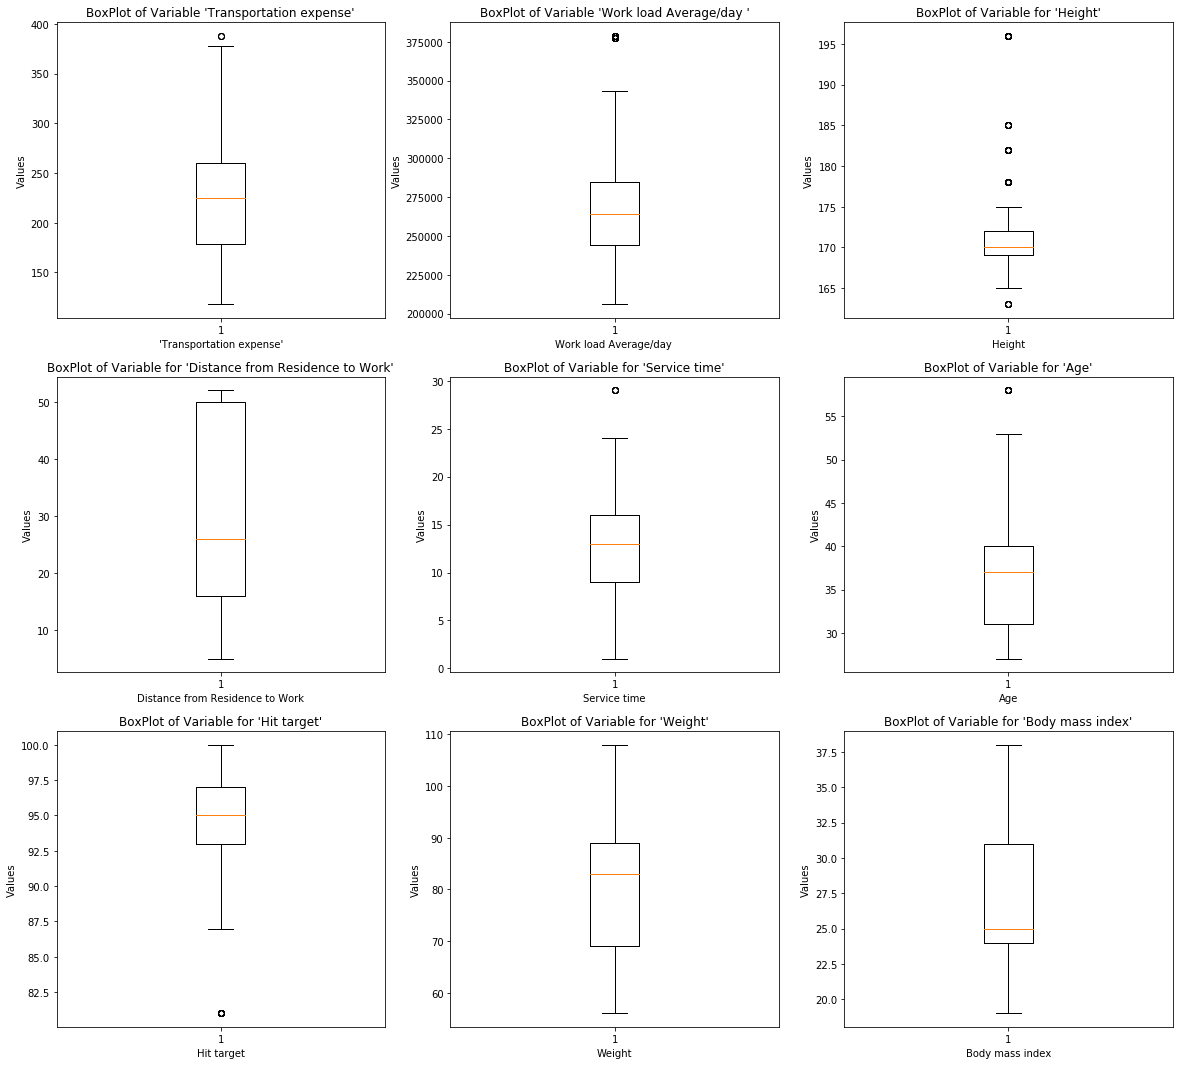

In [19]:
############## Outlier Analysis ###################
# Will check outlier for continuous Variable

fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 20
fig_size[1] = 25

plt.subplot(4,3,1)
plt.boxplot(Train_data['Transportation expense'])
plt.xlabel("'Transportation expense'")
plt.title("BoxPlot of Variable 'Transportation expense'")
plt.ylabel('Values')

plt.subplot(4,3,2)
plt.boxplot(Train_data['Work load Average/day '])
plt.xlabel("Work load Average/day ")
plt.title("BoxPlot of Variable 'Work load Average/day '")
plt.ylabel('Values')

plt.subplot(4,3,3)
plt.boxplot(Train_data['Height'])
plt.xlabel("Height")
plt.title("BoxPlot of Variable for 'Height'")
plt.ylabel('Values')

plt.subplot(4,3,4)
plt.boxplot(Train_data['Distance from Residence to Work'])
plt.xlabel("Distance from Residence to Work")
plt.title("BoxPlot of Variable for 'Distance from Residence to Work'")
plt.ylabel('Values')

plt.subplot(4,3,5)
plt.boxplot(Train_data['Service time'])
plt.xlabel("Service time")
plt.title("BoxPlot of Variable for 'Service time'")
plt.ylabel('Values')

plt.subplot(4,3,6)
plt.boxplot(Train_data['Age'])
plt.xlabel("Age")
plt.title("BoxPlot of Variable for 'Age'")
plt.ylabel('Values')

plt.subplot(4,3,7)
plt.boxplot(Train_data['Hit target'])
plt.xlabel("Hit target")
plt.title("BoxPlot of Variable for 'Hit target'")
plt.ylabel('Values')

plt.subplot(4,3,8)
plt.boxplot(Train_data['Weight'])
plt.xlabel("Weight")
plt.title("BoxPlot of Variable for 'Weight'")
plt.ylabel('Values')

plt.subplot(4,3,9)
plt.boxplot(Train_data['Body mass index'])
plt.xlabel("Body mass index")
plt.title("BoxPlot of Variable for 'Body mass index'")
plt.ylabel('Values')

In [20]:
############### Removing Outlier ##############
# list of variables which doesn't have outlier
Drop = ['Distance from Residence to Work', 'Weight', 'Body mass index']

# Looping over all continuous variables to detect and remove Outliers
for i in continuous_variable:
    # Avoiding the variables which doesn't have outlier
    if i in Drop:
        continue
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(Train_data[i], [75,25])
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    print(minimum)
    maximum = q75 + (iqr*1.5)
    print(maximum)
    
    # Replacing all the outliers value to NA
    Train_data.loc[Train_data[i]< minimum,i] = np.nan
    Train_data.loc[Train_data[i]> maximum,i] = np.nan

-1.5
26.5
17.5
53.5
183688.0
345552.0
57.5
381.5
87.0
103.0
164.5
176.5
-7.0
17.0


In [21]:
# Checking if there is any missing value
Train_data.isnull().sum().sum()

231

In [22]:
# Imputing missing values with KNN
Train_data = pd.DataFrame(KNN(k = 5).fit_transform(Train_data), columns = Train_data.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.130
Imputing row 101/740 with 1 missing, elapsed time: 0.131
Imputing row 201/740 with 0 missing, elapsed time: 0.132
Imputing row 301/740 with 0 missing, elapsed time: 0.134
Imputing row 401/740 with 0 missing, elapsed time: 0.135
Imputing row 501/740 with 0 missing, elapsed time: 0.136
Imputing row 601/740 with 0 missing, elapsed time: 0.137
Imputing row 701/740 with 0 missing, elapsed time: 0.138


In [23]:
# Checking if there is any missing value
Train_data.isnull().sum().sum()

0

[]

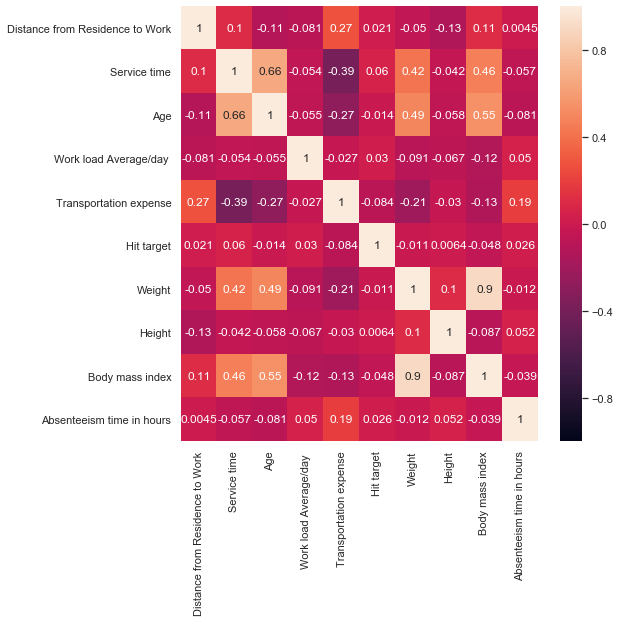

In [24]:
#################### Feature Selection #################

##Correlation analysis for continuous variables
#Correlation plot
Train_data_corr = Train_data.loc[:,continuous_variable]

#Set the width and hieght of the plot
sns.set(rc={'figure.figsize':(8,8)})

sns.heatmap(Train_data_corr.corr(), vmin=-1.00, vmax=1.00, annot=True)
plt.plot()

In [25]:
# Droping the variables which has redundant information
Drop = ['Weight']
Train_data = Train_data.drop(Drop, axis = 1)

In [26]:
# Updating the Continuous Variables and Categorical Variables after droping some variables
continuous_variable = [i for i in continuous_variable if i not in Drop]
categorical_variable = [i for i in categorical_variable if i not in Drop]

In [27]:
clean_data = Train_data.copy()

In [28]:
#Shape of the dataframe
Train_data.shape   # 20 variables & 740 Observation

(740, 20)

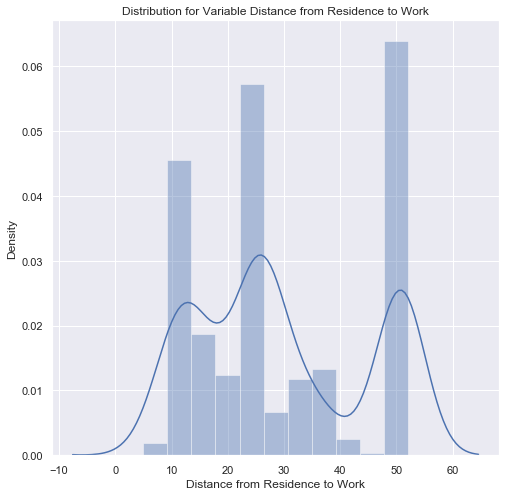

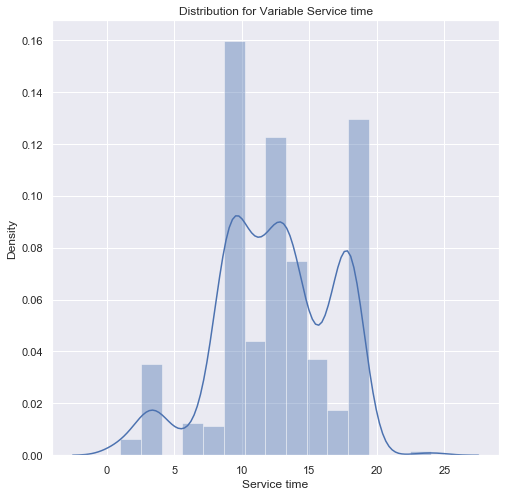

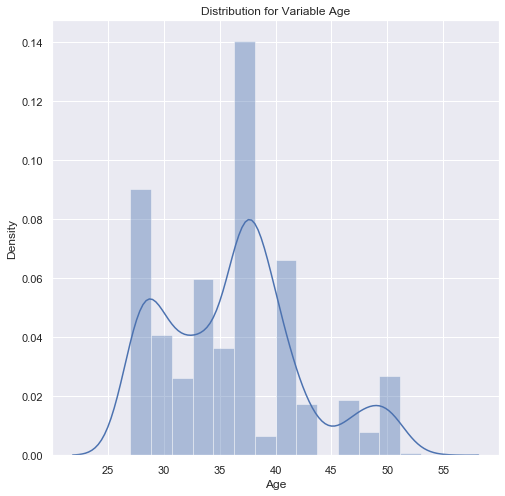

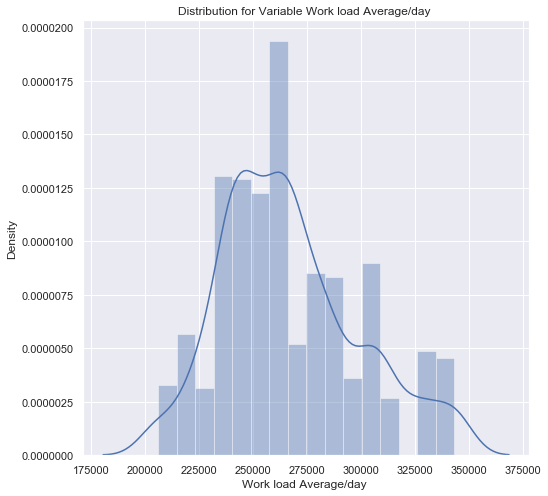

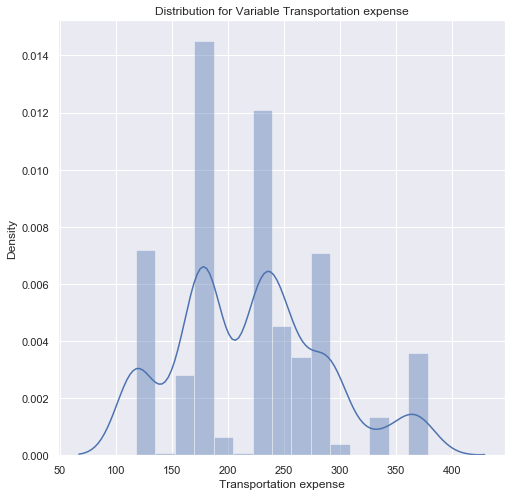

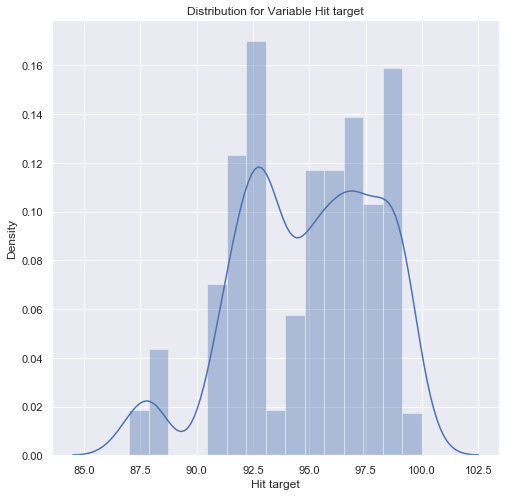

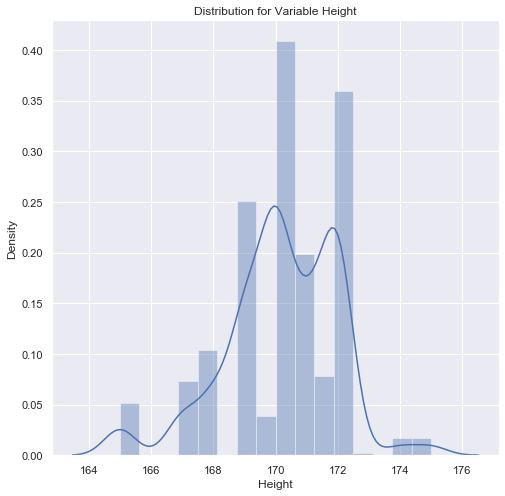

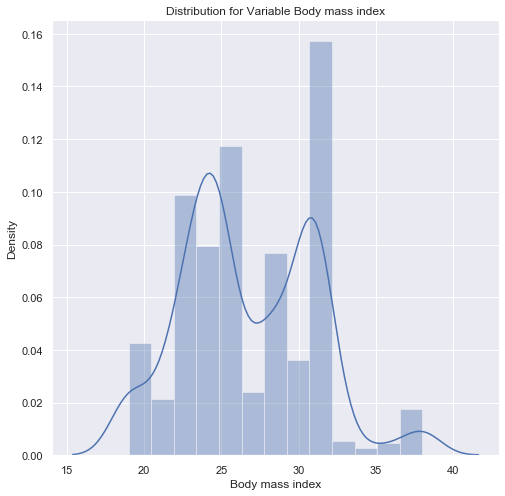

In [29]:
#################### feature Scaling ####################

# Checking if there is any normally distributed variable in data
for i in continuous_variable:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(Train_data[i],bins = 'auto')
    plt.title("Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [30]:
# Since there is no normally distributed curve we will use Normalization for Feature Scalling
# #Normalization
for i in continuous_variable:
    if i == 'Absenteeism time in hours':
        continue
    Train_data[i] = (Train_data[i] - Train_data[i].min())/(Train_data[i].max()-Train_data[i].min())
    
Train_data.head(5)

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11.0                26.0               7.0              3.0      1.0   
1  36.0                 0.0               7.0              3.0      1.0   
2   3.0                23.0               7.0              4.0      1.0   
3   7.0                 7.0               7.0              5.0      1.0   
4  11.0                23.0               7.0              5.0      1.0   

   Transportation expense  Distance from Residence to Work  Service time  \
0                0.657692                         0.659574      0.521739   
1                0.000000                         0.170213      0.739130   
2                0.234615                         0.978723      0.739130   
3                0.619231                         0.000000      0.565217   
4                0.657692                         0.659574      0.521739   

        Age  Work load Average/day   Hit target  Disciplinary failure  \
0  0.230769                0.244925    0.769231                   0.0   
1  0.884615                0.244925    0.769231                   1.0   
2  0.423077                0.244925    0.769231                   0.0   
3  0.461538                0.244925    0.769231                   0.0   
4  0.230769                0.244925    0.769231                   0.0   

   Education  Son  Social drinker  Social smoker  Pet    Height  \
0        1.0  2.0             1.0            0.0  1.0  0.700000   
1        1.0  1.0             1.0            0.0  0.0  0.500001   
2        1.0  0.0             1.0            0.0  0.0  0.500000   
3        1.0  2.0             1.0            1.0  0.0  0.300000   
4        1.0  2.0             1.0            0.0  1.0  0.700000   

   Body mass index  Absenteeism time in hours  
0         0.578947                        4.0  
1         0.631579                        0.0  
2         0.631579                        2.0  
3         0.263158                        4.0  
4         0.578947                        2.0

In [32]:
# Will get the dummy variables for categorical variables
Train_data = pd.get_dummies(data = Train_data, columns = categorical_variable)
# Will see the 1st row of data
Train_data.iloc[:, Train_data.columns != 'Absenteeism time in hours'].head(1)

Transportation expense  Distance from Residence to Work  Service time  \
0                0.657692                         0.659574      0.521739   

        Age  Work load Average/day   Hit target  Height  Body mass index  \
0  0.230769                0.244925    0.769231     0.7         0.578947   

   ID_1.0  ID_2.0  ...  Pet_8.0  Son_0.0  Son_0.06341489870376639  \
0       0       0  ...        0        0                        0   

   Son_0.9932859029784774  Son_1.0  Son_1.667895348435812  Son_2.0  Son_3.0  \
0                       0        0                      0        1        0   

   Son_3.926527954687343  Son_4.0  
0                      0        0  

[1 rows x 138 columns]

In [33]:
Train_data.shape

(740, 139)

In [34]:
##################### Modelling ############
# Now coming to train_test. Using train_test_split sampling function for test and train data split

X_train, X_test, y_train, y_test = train_test_split( Train_data.iloc[:, Train_data.columns != 'Absenteeism time in hours'], Train_data.iloc[:, 8], test_size = 0.20)

In [35]:
#linear Regression
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_LR.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_LR.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 2.3181712983566825
Root Mean Squared Error For Test data = 13441930815790.06
R^2 Score(coefficient of determination) = -1.399941416748502e+25


In [38]:
# decision tree algorithm
#Build model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

#Calculate RMSE for training data to check model overfit
pred_train = fit_DT.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_train))
print("Root Mean Squared Error For Test data = "+str(rmse_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 3.148646325990076
Root Mean Squared Error For Test data = 3.304578571103281
R^2 Score(coefficient of determination) = 0.15390580543114518


In [36]:
# Random Forest Algorithm
# Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_RF.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 1.0267339412860024
Root Mean Squared Error For Test data = 2.8347440445096024
R^2 Score(coefficient of determination) = 0.37739263511911547


In [37]:
# Random Forest Algorithm
# Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 1000).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_RF.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 1.027239962426932
Root Mean Squared Error For Test data = 2.829068344148073
R^2 Score(coefficient of determination) = 0.37988329754621675
